# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 164.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 159.7 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 141.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 162.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 161.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
df.head()



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [5]:
dup_rows = df.duplicated(keep="first")
dup_rows.sum()

np.int64(0)

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [6]:
missing_value = df["CodingActivities"].isna()
missing_value

0        False
1        False
2        False
3         True
4         True
         ...  
65432    False
65433    False
65434    False
65435    False
65436     True
Name: CodingActivities, Length: 65437, dtype: bool

In [7]:
## Write your code here
missing_value = df["CodingActivities"].isna()
num_missing = missing_value.sum()

print(f"the number of missing values is {num_missing}")

the number of missing values is 10971


In [8]:
for activity, count in df["CodingActivities"].value_counts().items():
    print(f"{activity}: {count}")

Hobby: 9993
I don’t code outside of work: 6508
Hobby;Professional development or self-paced learning from online courses: 6203
Hobby;Contribute to open-source projects: 3732
Professional development or self-paced learning from online courses: 3120
Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses: 2374
Hobby;School or academic work: 1521
Hobby;Freelance/contract work: 1420
Hobby;Professional development or self-paced learning from online courses;Freelance/contract work: 1231
Hobby;Bootstrapping a business: 1146
Freelance/contract work: 1072
Hobby;Bootstrapping a business;Professional development or self-paced learning from online courses: 1052
Hobby;School or academic work;Professional development or self-paced learning from online courses: 1032
Bootstrapping a business: 821
Hobby;Contribute to open-source projects;Freelance/contract work: 795
Hobby;Contribute to open-source projects;Professional development or self-paced learn

##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [9]:
## Write your code here
df["CodingActivities"].fillna(method="ffill", inplace=True)
new_sum = df["CodingActivities"].isna().sum()
print(f"The number of missing values after the forward fill is {new_sum}")

The number of missing values after the forward fill is 0


/tmp/ipykernel_299/748472364.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CodingActivities"].fillna(method="ffill", inplace=True)
/tmp/ipykernel_299/748472364.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["CodingActivities"].fillna(method="ffill", inplace=True)


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [10]:
## Write your code here
comp_cols = [col for col in df if 'comp' in col.lower()] 
print(comp_cols) 

['CompTotal', 'AIComplex', 'ConvertedCompYearly']


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [11]:
num_missing = df["ConvertedCompYearly"].isna().sum()
print(f"The number of missing values in converted yearly compensation is {num_missing}.")

The number of missing values in converted yearly compensation is 42002.


In [12]:
comp_median = df["ConvertedCompYearly"].median()
df["ConvertedCompYearly"] = df["ConvertedCompYearly"].fillna(comp_median)

df["ConvertedCompYearly"].head()

0    65000.0
1    65000.0
2    65000.0
3    65000.0
4    65000.0
Name: ConvertedCompYearly, dtype: float64

In [13]:
## Write your code here
df["ConvertedCompYearly_MinMax"] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())
df["ConvertedCompYearly_MinMax"].head()

0    0.003998
1    0.003998
2    0.003998
3    0.003998
4    0.003998
Name: ConvertedCompYearly_MinMax, dtype: float64

##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [14]:
## Write your code here

df["ConvertedCompYearly_Zscore"] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean())/(df['ConvertedCompYearly'].std())
df["ConvertedCompYearly_Zscore"].head()

0   -0.067513
1   -0.067513
2   -0.067513
3   -0.067513
4   -0.067513
Name: ConvertedCompYearly_Zscore, dtype: float64

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


In [15]:
df["ConvertedCompYearly"][23000:23056]

23000     26320.0
23001     65000.0
23002     65000.0
23003     41872.0
23004     47778.0
23005     65000.0
23006     30000.0
23007     42962.0
23008     85925.0
23009    175151.0
23010    107406.0
23011     65000.0
23012    275000.0
23013     53419.0
23014     97117.0
23015     65000.0
23016     65000.0
23017     65000.0
23018     71538.0
23019     75184.0
23020     65000.0
23021     65000.0
23022     65000.0
23023     65000.0
23024     84796.0
23025     81629.0
23026     65000.0
23027     65000.0
23028     65000.0
23029     76258.0
23030      7178.0
23031      4385.0
23032     53703.0
23033     65000.0
23034     65000.0
23035     65000.0
23036     75184.0
23037      7178.0
23038     38398.0
23039     65000.0
23040     96666.0
23041     89087.0
23042    200000.0
23043     60663.0
23044     65000.0
23045      1663.0
23046    107406.0
23047     65000.0
23048     34896.0
23049     71962.0
23050     52503.0
23051     65000.0
23052     65000.0
23053     65518.0
23054     26320.0
23055     

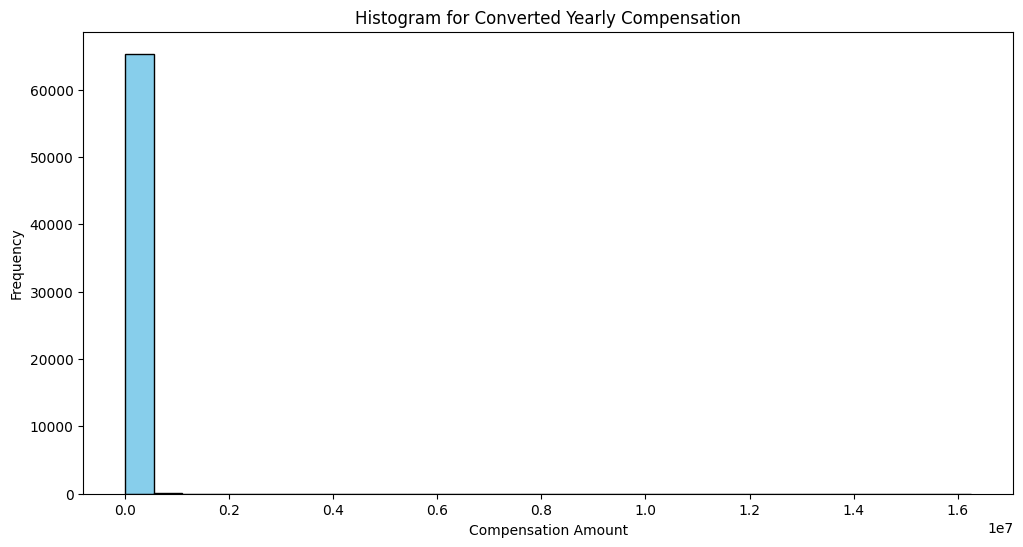

In [17]:

plt.figure(figsize=(12, 6))

plt.hist(df["ConvertedCompYearly"], bins=30, color="skyblue", edgecolor="black")

plt.title("Histogram for Converted Yearly Compensation")
plt.xlabel("Compensation Amount")
plt.ylabel("Frequency") 

plt.show()

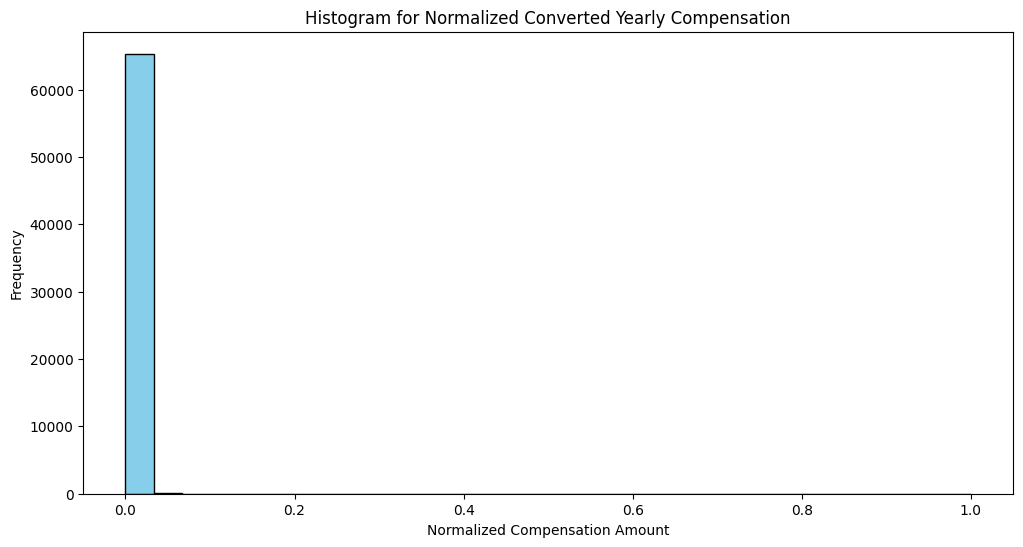

In [19]:
plt.figure(figsize=(12, 6))

plt.hist(df["ConvertedCompYearly_MinMax"], bins=30, color="skyblue", edgecolor="black")

plt.title("Histogram for Normalized Converted Yearly Compensation")
plt.xlabel("Normalized Compensation Amount")
plt.ylabel("Frequency") 

plt.show()

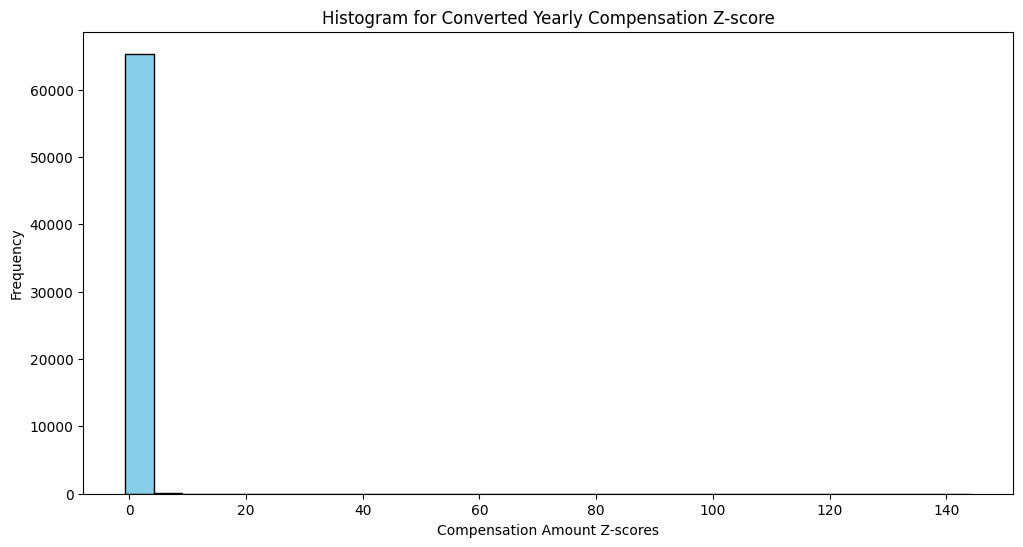

In [20]:
data2 = df["ConvertedCompYearly_Zscore"]

plt.figure(figsize=(12, 6))

plt.hist(data2, bins=30, color="skyblue", edgecolor="black")

plt.title("Histogram for Converted Yearly Compensation Z-score")
plt.xlabel("Compensation Amount Z-scores")
plt.ylabel("Frequency") 

plt.show()

In [27]:
for col in ["ConvertedCompYearly_Zscore","ConvertedCompYearly_MinMax","ConvertedCompYearly"]:
    print(df[col].describe())
    print("\n"+"="*50+"\n")

count    6.543700e+04
mean    -5.733248e-17
std      1.000000e+00
min     -6.467200e-01
25%     -6.751303e-02
50%     -6.751303e-02
75%     -6.751303e-02
max      1.442161e+02
Name: ConvertedCompYearly_Zscore, dtype: float64


count    65437.000000
mean         0.004464
std          0.006903
min          0.000000
25%          0.003998
50%          0.003998
75%          0.003998
max          1.000000
Name: ConvertedCompYearly_MinMax, dtype: float64


count    6.543700e+04
mean     7.257636e+04
std      1.122207e+05
min      1.000000e+00
25%      6.500000e+04
50%      6.500000e+04
75%      6.500000e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64




### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
